## This notebook provide the instructions on how to read the LLC4320 data from the OSDF/Pelican using OpenVisus framework.

### To run this notebook properly, you need to install the library `OpenVisus`. To install this, please run the following command from your terminal:
`pip install OpenVisus`

# **Step 1: Importing the libraries**

In [1]:
import numpy as np
import openvisuspy as ovp
import matplotlib.pyplot as plt
import os
os.environ['VISUS_CACHE']= "./visus_can_be_deleted"

## **Step 2: Reading the metadata file from cloud**
In this section, you can select any variables that you can declared in the cells above and replace it inside `LoadDataset`. We are just reading the metadata for the dataset here.

In [4]:
# LLC2160 data
u_url = "https://maritime.sealstorage.io/api/v0/s3/utah/nasa/dyamond/mit_output/llc2160_arco/visus.idx?access_key=any&secret_key=any&endpoint_url=https://maritime.sealstorage.io/api/v0/s3&cached=arco"
w_url = "https://maritime.sealstorage.io/api/v0/s3/utah/nasa/dyamond/mit_output/llc2160_w/llc2160_w.idx?access_key=any&secret_key=any&endpoint_url=https://maritime.sealstorage.io/api/v0/s3&cached=arco"
v_url = "https://maritime.sealstorage.io/api/v0/s3/utah/nasa/dyamond/mit_output/llc2160_v/v_llc2160_x_y_depth.idx?access_key=any&secret_key=any&endpoint_url=https://maritime.sealstorage.io/api/v0/s3&cached=arco"

urls = [u_url, w_url, v_url]

In [5]:
dbs =  {}
for url in urls:
    db=ovp.LoadDataset(url)
    print(f'Dimensions: {db.getLogicBox()[1][0]}*{db.getLogicBox()[1][1]}*{db.getLogicBox()[1][2]}')
    print(f'Total Timesteps: {len(db.getTimesteps())}')
    field = db.getField().name
    print(f'Field: {field}')
    print('Data Type: float32')
    dbs[field] = db

Dimensions: 8640*6480*90
Total Timesteps: 10366
Field: u
Data Type: float32
Dimensions: 8640*6480*90
Total Timesteps: 10366
Field: w
Data Type: float32
Dimensions: 8640*6480*90
Total Timesteps: 10366
Field: v
Data Type: float32


## **Step 3:  Data Selection**
This section shows you how to load the data you want. You can select any timestep, region (x,y,z) you want. You can set the quality or resolution of the data as well. Higher quality means the finer(more) data. Not setting any time means first timestep available. Not setting quality means full data which takes a while to load because of the higher filesize.  Since each timestep is >30GB, I am only selecting 1 level out of 90.

In [10]:
data = {}
for key in dbs:
    data[key] = dbs[key].db.read(time=0, quality=-27)
#data=db.db.read(time=0,z=[0,1],quality=-12) #Since each timestep is >30GB, I am only selecting 1 level out of 90.

data['u'].shape

(1, 7, 9)

In [11]:
type(data['u'])

numpy.ndarray

## **Step 4:  Visualize the data**
We are using a simple matplotlib here, but since the data is in numpy array, it can loaded with any python modules that support numpy. Feel free to set the `vmin`,`vmax` appropriately.

In [58]:
from mpl_toolkits.mplot3d import Axes3D

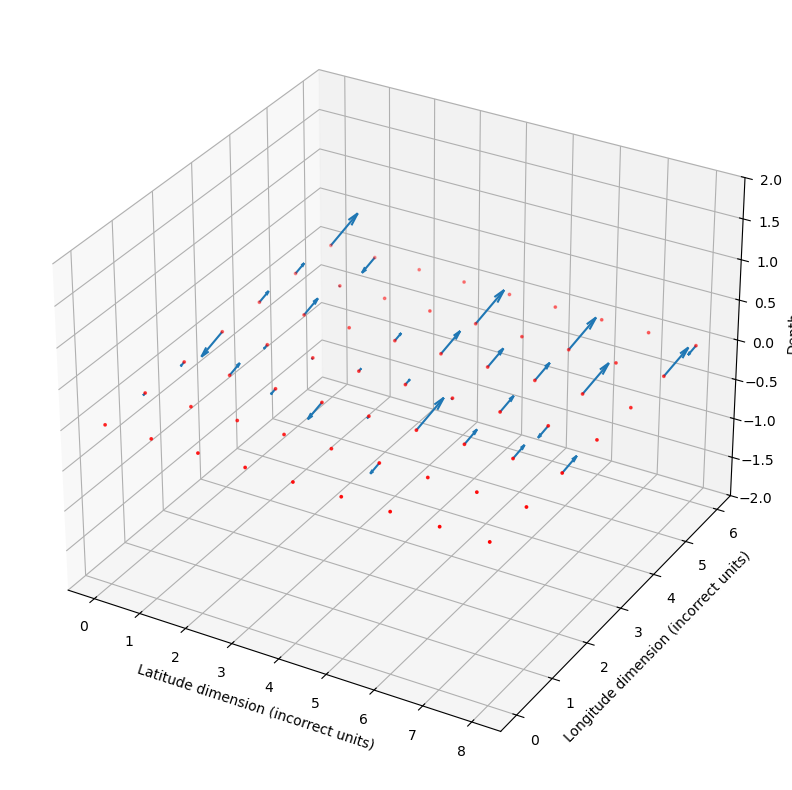

In [80]:
u = data['u']
v = data['v']
w = data['w']

depth_indices = np.arange(u.shape[0], dtype=int)
height_indices = np.arange(u.shape[1], dtype=int)
width_indices = np.arange(u.shape[2], dtype=int)

# create meshgrid
z, y, x = np.meshgrid(depth_indices, height_indices, width_indices, indexing='ij')

# plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(x, y, z, u, v, w) # velocity vectors
ax.scatter(x, y, z, color='red', s=3, label='Arrow origins') # vector origins

ax.set_xlabel('Latitude dimension (incorrect units)')
ax.set_ylabel('Longitude dimension (incorrect units)')
ax.set_zlabel('Depth')
ax.set_zlim(-2, 2)

plt.show()